## Data Cleaning

In [13]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('../data/SummerStudentAdmissions2.csv')
df.head(10)

,Decision,State,GPA,WorkExp,TestScore,WritingScore,Gender,VolunteerLevel
0,Admit,California,3.90,6.7,962.0,100,1.0,0
1,Admit,Florida,3.80,1.4,969.0,97,1.0,4
2,Banana,California,3.80,2.3,970.0,98,0.0,5
3,Admit,Colorado,3.60,0.9,969.0,97,0.0,2
4,Admit,Colorado,3.92,1.2,969.0,95,-1.0,3
5,NaN,California,3.80,1.2,NaN,95,0.0,4
6,Admit,California,3.88,1.5,967.0,95,1.0,5
7,Admit,California,3.70,1.2,969.0,94,1.0,2
8,Admit,Florida,3.90,4.7,961.0,93,1.0,1
9,Admit,California,3.70,1.4,966.0,94,1.0,0


In [15]:
df.isna().sum()

Decision          1
State             0
GPA               1
WorkExp           0
TestScore         1
WritingScore      0
Gender            2
VolunteerLevel    0
dtype: int64

In [16]:
df = df[df['Decision'].notna()]
df.head(10)

,Decision,State,GPA,WorkExp,TestScore,WritingScore,Gender,VolunteerLevel
0,Admit,California,3.90,6.7,962.0,100,1.0,0
1,Admit,Florida,3.80,1.4,969.0,97,1.0,4
2,Banana,California,3.80,2.3,970.0,98,0.0,5
3,Admit,Colorado,3.60,0.9,969.0,97,0.0,2
4,Admit,Colorado,3.92,1.2,969.0,95,-1.0,3
6,Admit,California,3.88,1.5,967.0,95,1.0,5
7,Admit,California,3.70,1.2,969.0,94,1.0,2
8,Admit,Florida,3.90,4.7,961.0,93,1.0,1
9,Admit,California,3.70,1.4,966.0,94,1.0,0
10,Admit,Florida,3.80,1.7,968.0,91,NaN,3


In [17]:
df.isna().sum()

Decision          0
State             0
GPA               1
WorkExp           0
TestScore         0
WritingScore      0
Gender            2
VolunteerLevel    0
dtype: int64

In [18]:
df = df.dropna()

In [19]:
# remove nonsensical answers in Decision and Gender columns
df['Decision'].unique()
df = df[df['Decision'] != 'Banana']
print(df.shape)
df = df.drop(df[df["Gender"] < 0].index)
df.head()

(83, 8)


,Decision,State,GPA,WorkExp,TestScore,WritingScore,Gender,VolunteerLevel
0,Admit,California,3.90,6.7,962.0,100,1.0,0
1,Admit,Florida,3.80,1.4,969.0,97,1.0,4
3,Admit,Colorado,3.60,0.9,969.0,97,0.0,2
6,Admit,California,3.88,1.5,967.0,95,1.0,5
7,Admit,California,3.70,1.2,969.0,94,1.0,2


In [45]:
# capitalize all states
df.State = df.State.str.title()
df['State'] = df['State'].replace('New york', 'New York')

In [23]:
# Save to csv
df.to_csv("../data/clean_data.csv", index=False)

## Visualizations

In [10]:
# Hide output with -q
!pip install -q altair

In [46]:
decision_count = df.groupby(['Decision', 'State']).size().reset_index()
decision_count = decision_count.rename(columns={0: 'Count'})
decision_count

,Decision,State,Count
0,Admit,California,9
1,Admit,Colorado,10
2,Admit,Florida,11
3,Admit,Utah,1
4,Decline,California,1
5,Decline,Colorado,6
6,Decline,Florida,13
7,Decline,Mississippi,1
8,Decline,Oregon,1
9,Decline,Utah,2


In [12]:
import altair as alt

unique_states = decision_count['State'].unique().tolist()

# Dropdown selection
input_dropdown = alt.binding_select(options=[None] + unique_states, labels = ['All'] + unique_states, name='State')
selection = alt.selection_single(fields=['State'], bind=input_dropdown)

decision_bar = alt.Chart(decision_count).transform_filter(
    selection
).mark_bar().encode(
    alt.X('Decision:O', title='Decision'),
    alt.Y('Count:Q', title='Count'),
).add_selection(selection).interactive()
chart_title = "Bar Chart of Decision Results Counts for States"
decision_bar = decision_bar.properties(title=chart_title)

decision_bar

c:\Users\theda\anaconda3\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'selection_single' is deprecated.  Use 'selection_point'
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
c:\Users\theda\anaconda3\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


alt.Chart(...)

In [13]:
import altair as alt

unique_states = decision_count['State'].unique().tolist()

# # Dropdown selection
# input_dropdown = alt.binding_select(options=[None] + unique_states, labels = ['All'] + unique_states, name='State')
# selection = alt.selection_single(fields=['State'], bind=input_dropdown)

decision_bar = alt.Chart(decision_count).mark_bar().encode(
    x=alt.X('Decision:O', title='Decision', axis=alt.Axis(labelAngle=0), sort='-y'),
    y=alt.Y('Count:Q', title='Count'),
    xOffset='State',
    color=alt.Color('State:N', sort=alt.EncodingSortField(field='Count', op='sum', order='descending'))#, scale=alt.Scale(scheme='inferno'))
)
chart_title = "Bar Chart of Decision Results Counts for States"
decision_bar = decision_bar.properties(title=chart_title)

decision_bar

alt.Chart(...)

array([[<Axes: title={'center': 'Admit'}>,
        <Axes: title={'center': 'Decline'}>],
       [<Axes: title={'center': 'Waitlist'}>, <Axes: >]], dtype=object)

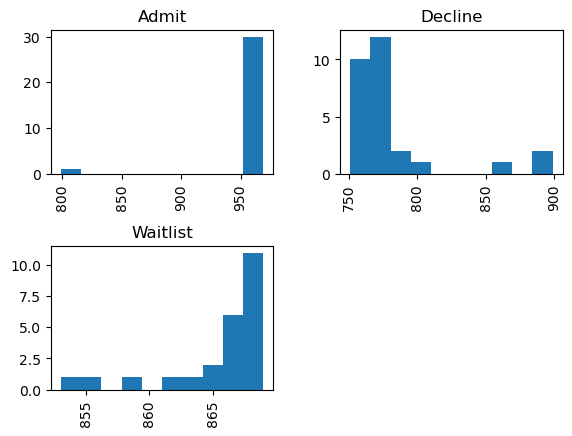

In [14]:
df.hist('TestScore', by='Decision')

[Text(0.5, 1.0, 'Histogram of Test Scores by Decision')]

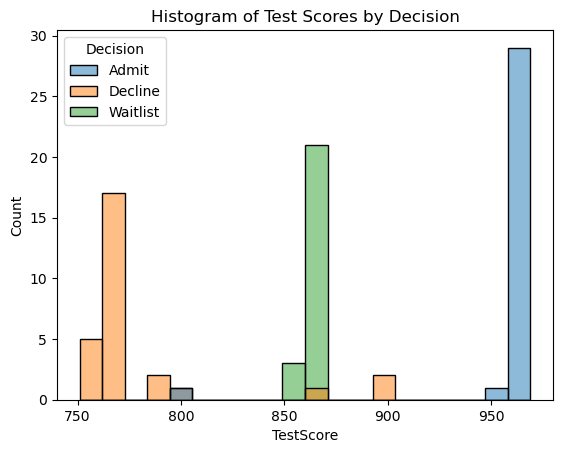

In [26]:
sns.histplot(x="TestScore", hue="Decision", data=df, bins=20).set(title='Histogram of Test Scores by Decision')

In [66]:
# Dropdown selection
input_dropdown = alt.binding_select(options=[None] + unique_states, labels = ['All'] + unique_states, name='State')
selection = alt.selection_single(fields=['State'], bind=input_dropdown)

gpa_bar = alt.Chart(df).transform_filter(
    selection
).mark_bar(
    opacity=0.5,
    binSpacing=0
).encode(
    alt.X('GPA:Q'),
    alt.Y('count()', title='Count of Occurrences'),
    alt.Color('Decision:N')
).add_selection(selection).interactive()
chart_title = "Histogram of GPA by Decision Result for States"
gpa_bar = gpa_bar.properties(title=chart_title)

gpa_bar

c:\Users\theda\anaconda3\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'selection_single' is deprecated.  Use 'selection_point'
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
c:\Users\theda\anaconda3\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


alt.Chart(...)

## Maps

In [47]:
#calculate averages of all numeric columns
num_cols = df[['State', 'GPA', 'WorkExp', 'TestScore', 'WritingScore', 'VolunteerLevel']]
avg_df = num_cols.groupby('State').mean().reset_index()
avg_df

,State,GPA,WorkExp,TestScore,WritingScore,VolunteerLevel
0,Alabama,3.410000,1.200000,868.000000,85.000000,0.000000
1,California,3.600833,2.808333,916.166667,90.833333,2.666667
2,Colorado,3.616500,1.760000,886.250000,81.400000,2.400000
3,Florida,3.559143,2.117143,872.571429,80.428571,2.457143
4,Georgia,3.560000,100.000000,866.000000,89.000000,1.000000
5,Mississippi,2.910000,6.200000,753.000000,77.000000,1.000000
6,New York,3.550000,2.200000,866.000000,74.000000,1.000000
7,Oregon,2.900000,0.900000,769.000000,87.000000,4.000000
8,Utah,3.443333,1.250000,850.666667,78.333333,2.500000
9,Vermont,3.530000,3.300000,862.000000,85.000000,1.000000


In [48]:
import plotly.express as px

fig = px.choropleth(avg_df, locationmode="USA-states", 
                    locations=avg_df['State'], 
                    scope="usa",
                    color=avg_df['GPA'])

dropdown = []
for col in num_cols:
    if col != "GPA":
        dropdown.append({'label': col, 'method': 'update', 'args': [{'z': [num_cols[col]]}]})

fig.update_layout(updatemenus=[{'buttons': dropdown, 'direction': 'down', 'showactive': True}])

fig.show()

In [49]:
import plotly.graph_objects as go 

fig = go.Figure(go.Choropleth(
    locationmode="USA-states",
    locations=avg_df['State'],
    z=avg_df['GPA'],  
    colorscale='Viridis',
    colorbar=dict(title='Color')
))

fig.update_geos(scope="usa")

dropdown_buttons = []
for col in avg_df.columns[1:]:
    if col != "GPA":
        dropdown_buttons.append(
            dict(
                method="update",
                args=[{"z": [avg_df[col]]}],
                label=col
            )
        )

fig.update_layout(
    updatemenus=[
        dict(
            buttons=dropdown_buttons,
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.1,
            yanchor="top"
        ),
    ]
)

fig.show()

In [54]:
fig = go.Figure()

for feature in ['GPA', 'WorkExp', 'TestScore', 'WritingScore', 'VolunteerLevel']:
    fig.add_trace(
        go.Choropleth(
            locations=avg_df['State'],  # State names
            locationmode='USA-states',  # Set of locations match entries in 'locations'
            z=df[feature],  # Data to be color-coded
            colorscale='Viridis',  # Color scale
            colorbar_title=f'{feature}',  # Color bar title
            visible=False,  # Initially invisible
            name=feature  # Legend name
        )
    )

fig.update_layout(
    title_text='Choropleth Map',
    geo=dict(
        scope='usa',  # Map scope
    ),
)

buttons = []
for feature in ['GPA', 'WorkExp', 'TestScore', 'WritingScore', 'VolunteerLevel']:
    buttons.append(
        dict(
            label=feature,
            method='update',
            args=[{'visible': [feat == feature for feat in ['GPA', 'WorkExp', 'TestScore', 'WritingScore', 'VolunteerLevel']]}]
        )
    )

fig.update_layout(
    updatemenus=[
        dict(
            buttons=buttons,
            direction='down',
            pad={'r': 10, 't': 10},
            showactive=True,
            x=0,
            xanchor='left',
            y=1.2,
            yanchor='top',
        )
    ]
)

print(buttons)


fig.show()

[{'label': 'GPA', 'method': 'update', 'args': [{'visible': [True, False, False, False, False]}]}, {'label': 'WorkExp', 'method': 'update', 'args': [{'visible': [False, True, False, False, False]}]}, {'label': 'TestScore', 'method': 'update', 'args': [{'visible': [False, False, True, False, False]}]}, {'label': 'WritingScore', 'method': 'update', 'args': [{'visible': [False, False, False, True, False]}]}, {'label': 'VolunteerLevel', 'method': 'update', 'args': [{'visible': [False, False, False, False, True]}]}]
